In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,SCL90_IDEA_PARAN,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,SPQ_TOTAL_ESQUIZOT
0,17,5,0,7,5,13,2,20,0,24,4,0
1,13,11,3,6,11,17,11,17,1,22,9,0
2,20,20,20,11,8,3,0,20,1,30,12,1
3,12,1,0,4,6,3,1,18,0,20,4,0
4,8,9,17,4,14,2,6,27,17,35,17,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 80% de los datos para entrenamiento y un 20% de los datos para validación
valid_idx  =  range ( len ( df ) - 57 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_REESTCOGN', 'CSI_RETISOC', 'CSI_EVITPROBL', 'CAPE_POSIT_FREC', 'CSI_AUTOCRIT', 'TRAUMA_FRECUENCIA', 'SCL90_IDEA_PARAN', 'ANSIEDADRASGO', 'CSI_APOYOSOC', 'CSI_RESPROBL', 'CSI_PENSDESID']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[ 1.245314  1.06873   1.192199 -0.155272 ...  1.473508  0.766519  0.279192 -1.369567]
 [-0.777217 -0.196072 -0.328163 -0.314721 ... -0.793319 -0.911615 -1.128183 -0.871213]
 [ 1.42918   2.544333  2.495367 -0.314721 ...  1.473508 -0.072548  0.6813   -0.538977]
 [-1.328816 -0.406872 -0.979747  0.004178 ... -0.469486 -1.582869 -0.122915  1.288321]
 [ 0.325982 -0.617673 -1.196941 -1.111969 ... -0.793319 -0.408175  0.078139 -1.037331]]
[1 0 1 1 0]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.068273,0.990622,0.631579,05:16
1,0.914485,0.956566,0.631579,03:18
2,0.848373,0.929060,0.649123,04:11
3,0.798482,0.909792,0.614035,03:24
4,0.753309,0.895337,0.649123,04:17
5,0.708825,0.889686,0.666667,03:20
6,0.666396,0.885755,0.684211,03:23
7,0.638991,0.882245,0.666667,02:50
8,0.606958,0.876155,0.684211,02:49
9,0.578765,0.892051,0.684211,02:52


CSI_REESTCOGN,CSI_RETISOC,CSI_EVITPROBL,CAPE_POSIT_FREC,CSI_AUTOCRIT,TRAUMA_FRECUENCIA,SCL90_IDEA_PARAN,ANSIEDADRASGO,CSI_APOYOSOC,CSI_RESPROBL,CSI_PENSDESID,target,prediction
-0.2256,-0.1961,-0.3282,0.6420,0.6547,0.2933,1.0269,-0.1457,-1.0794,-0.3240,-0.7051,1,1
-0.5934,-1.0393,-0.7626,-0.3147,-0.9016,0.1049,-0.3213,-0.1457,-0.9116,-0.9271,-1.2034,0,0
0.1421,0.6471,0.7578,-1.1120,0.8276,-1.2139,-0.8991,-4.0316,0.0953,-0.5250,-0.3729,1,0
-0.7772,0.0147,-0.1110,-0.7931,0.3089,0.0107,-0.7065,-0.1457,-0.2404,-0.5250,-0.2067,0,0
-1.3288,0.2255,-1.1969,0.4825,0.1359,-0.6487,0.8343,0.6639,-0.4082,0.0781,1.2883,1,1


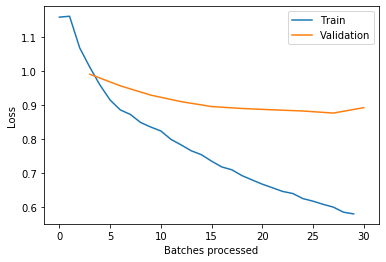

In [10]:
learn.recorder.plot_losses()
learn.show_results()